<a href="https://colab.research.google.com/github/spmilian/SocEnviron_Currency/blob/main/SocEnviron_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sympy as sp

#import scipy as s
import random as rd
import matplotlib.pyplot as plt
########################
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
########################
COLOR = '#40a6d1'
#######################
import sys
sys.setrecursionlimit(10000)

In [2]:
#########with time elimination
def dpds(p,s):
  return (0.12*p -(20/s))/(5*p - 0.1*s) ###From 0.12 to 0.1
#######################################
thestocks = np.linspace(12.001, 1000, 800) ###12.0001, 400, 1000
len(thestocks)
#thestocks

800

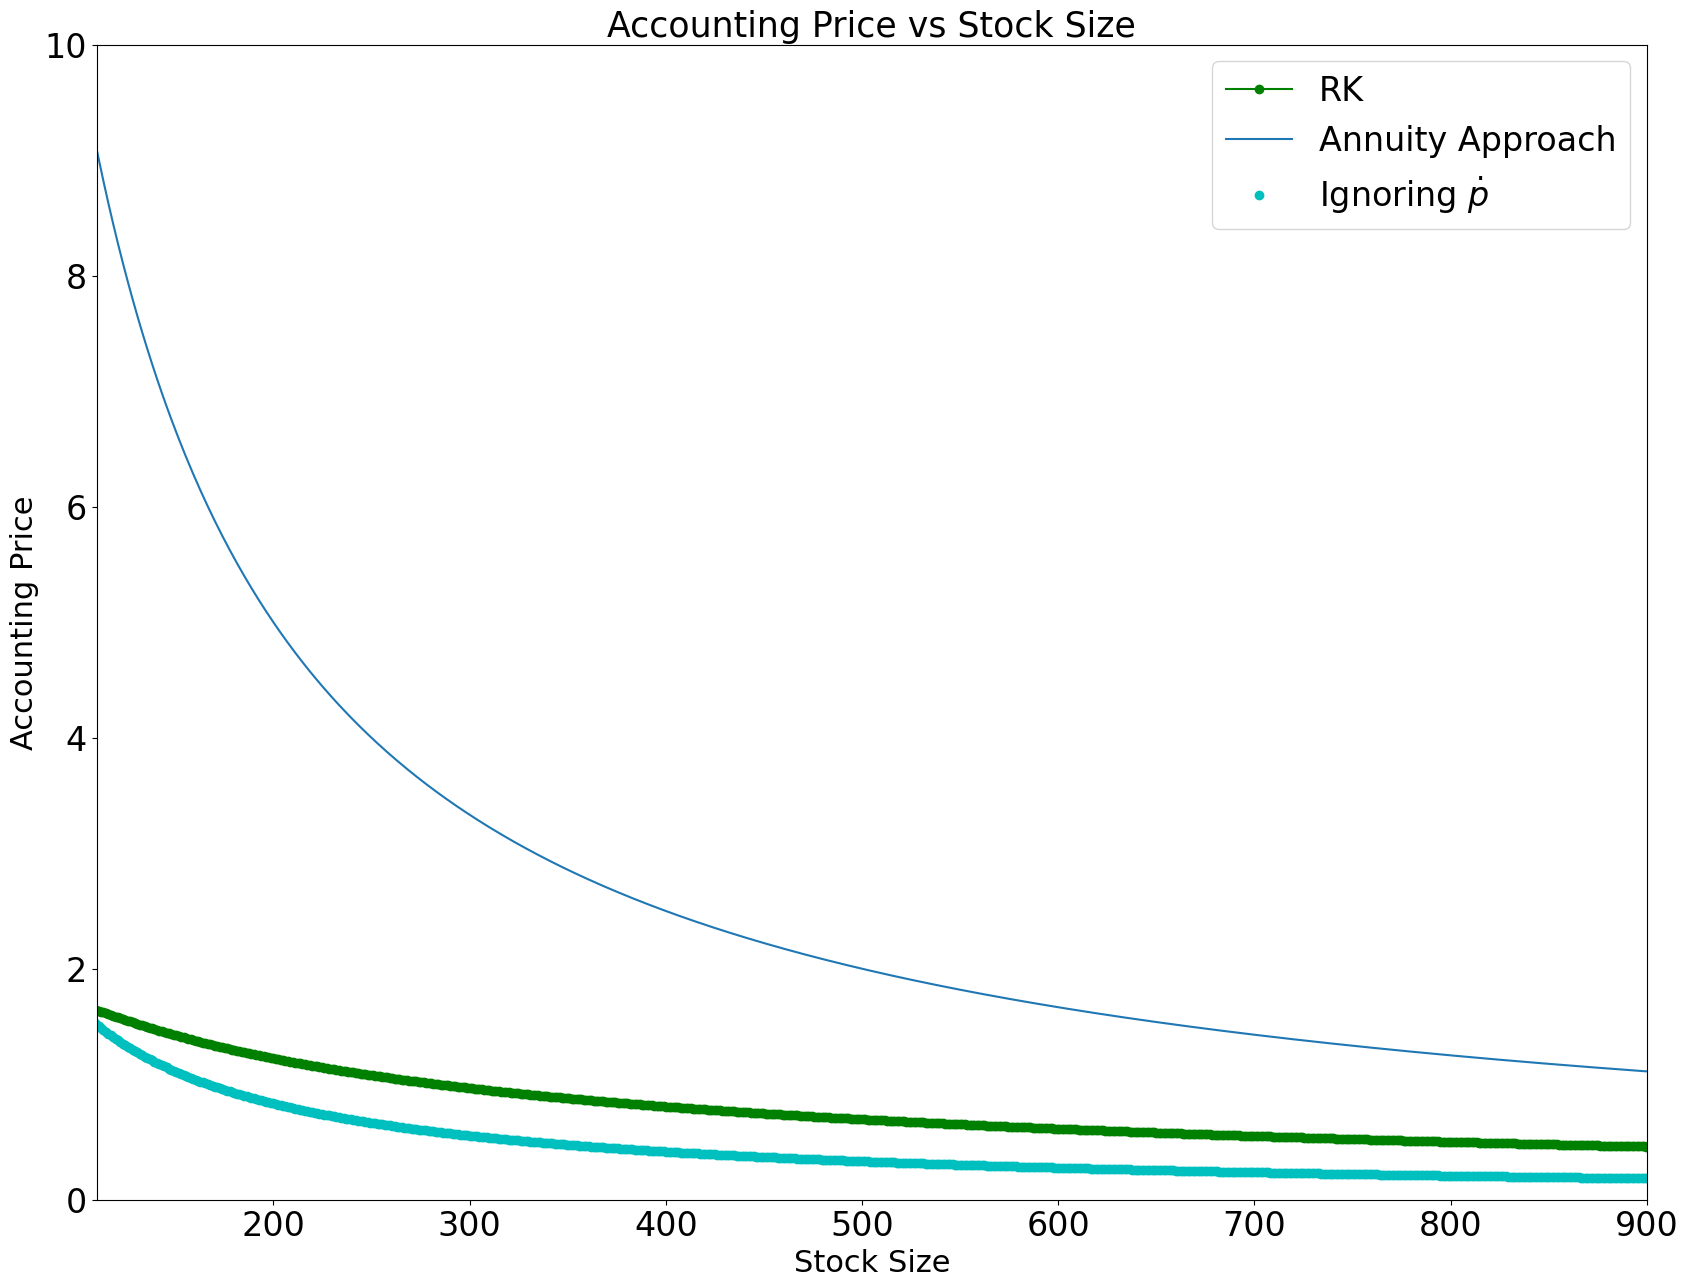

In [3]:
h = (thestocks[25] - thestocks[24])
#[p0, s0] = [3.75, 12.5]#sol_max
p0 = 3.6###3.6##
#[p0 , s0] = [0, 0]
#p0 = 3.75
p_points, s_points = list(), list()
for ss in thestocks:
  #print(ss)
  ###########################
  #############################################################Solving the ODEs
  p_points.append(p0)
  s_points.append(ss)
    ############################################### k0 and l0
    #m1 = h*u
    #k1 = h*F(y, u, x)  #(x, v, t)
    #k0 = h*P(p0, s0, t)
    #l0 = h*S(p0, s0, t)
  k0 = h*dpds(p0, ss)
    ############################################### k1 and l1
    #m2 = h*(u + 0.5*k1)
    #k2 = h*F(y+0.5*m1, u+0.5*k1, x+0.5*h)
    #k1 = h*P(p0 + 0.5*k0, s0 + 0.5*l0, t + 0.5*h)
    #l1 = h*S(p0 + 0.5*k0, s0 + 0.5*l0, t + 0.5*h)
  k1 = h*dpds(p0 + 0.5*k0, ss + 0.5*h)
    ############################################### k2 and l2

    #m3 = h*(u + 0.5*k2)
    #k3 = h*F(y+0.5*m2, u+0.5*k2, x+0.5*h)
    #k2 = h*P(p0 + 0.5*k1, s0 + 0.5*l1, t + 0.5*h)
    #l2 = h*S(p0 + 0.5*k1, s0 + 0.5*l1, t + 0.5*h)
  k2 = h*dpds( p0 + 0.5*k1, ss + 0.5*h)
    ################################################ k3 and l3

    #m4 = h*(u + k3)
    #k4 = h*F(y+m3, u+k3, x+h)
    #k3 = h*P(p0 + k2, s0 + l2, t + h)
    #l3 = h*S(p0 + k2, s0 + l2, t + h)
  k3 = h*dpds(p0 +k2, ss + h)
    ################################################ new_vals
    #y += (m1 + 2*m2 + 2*m3 + m4)/6
    #u += (k1 + 2*k2 + 2*k3 + k4)/6
    #p0 += (k0 + 2*k1 + 2*k2 + k3)*1./6
    #s0 += (l0 + 2*l1 + 2*l2 + l3)*1./6
  p0 += (k0 + 2*k1 + 2*k2 + k3)*1./6
############################################################
############################################################
fig = plt.figure(figsize= (20,15))
plt.plot(s_points, p_points, 'go-',label = 'RK')
plt.plot(s_points , [20/(ele*0.02) for ele in s_points],label = 'Annuity Approach')
plt.plot(s_points , [500/(3*ele) for ele in s_points],'co', label = 'Ignoring $\dot{p}$')
#plt.plot(xpoints, np.sin(xpoints)*1./(0.99*pi), label = 'True_solution')
#
plt.ylim([0, 10])
plt.xlim([110, 900])
plt.title('Accounting Price vs Stock Size', fontsize = 25)
plt.xlabel('Stock Size', fontsize = 22)
plt.ylabel('Accounting Price', fontsize = 22)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(fontsize = 24)
plt.savefig('theAccouting_price.png')
plt.show()